In [1]:
from ambientperiod.builder.build_period import BuildPeriod


In [2]:
import matplotlib.pyplot as plt

# Set the font family and size
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 10 
plt.rcParams['font.stretch'] = 'condensed'

In [3]:
# Configuration (defined here instead of a config.py)
config = {
    "Fs": 244,                          # % Frecuencia de muestreo
    "vent": 25,                         # % Duracion de las ventanas
    "STA": 1,       "LTA": 30,          # % Algoritmo STA/LTA
    "vmin": 0.5,    "vmax": 1.5,        # % Limites algoritmo STA/LTA
    "p": 0.05,                          # % R para tapper de ventana
    "f1": 1.0,      "f2": 50.0,         # % Límites de ancho de banda de frecuencia     
    "bexp": 40                          # % Constante de suavizado (Konno & Ohmachi 1998)
}

load_signal OK...
algorithm_sta_lta OK...


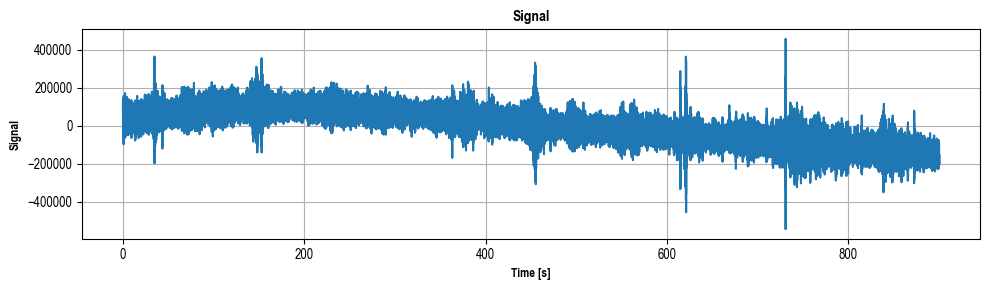

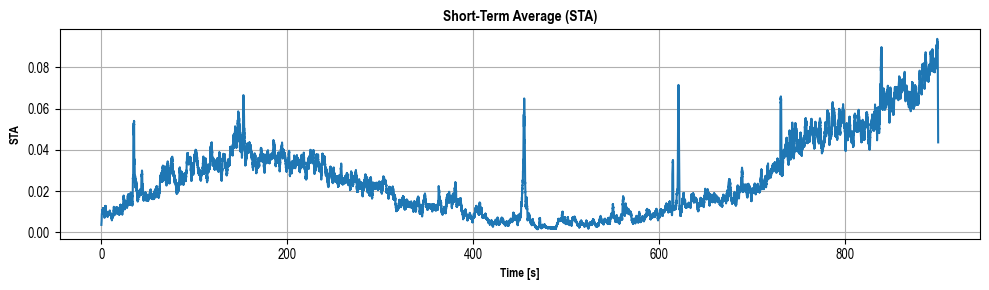

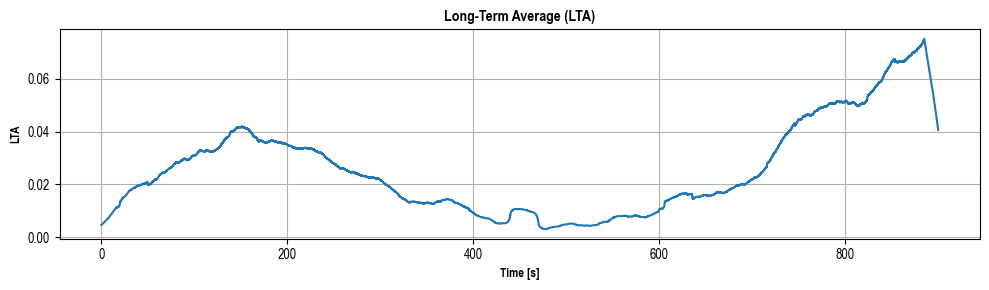

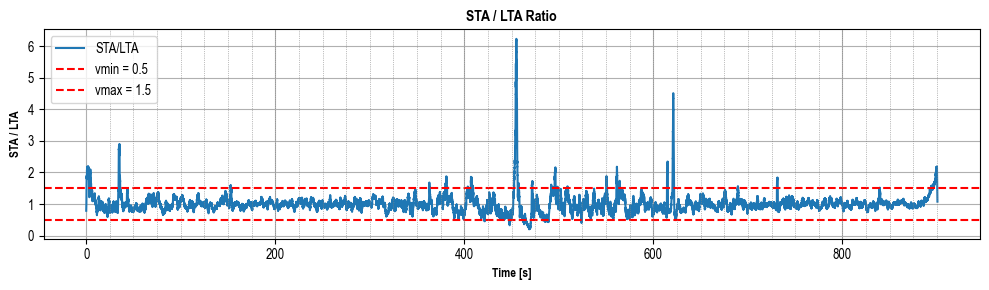

plot_sta_lta OK...
window_selector OK...


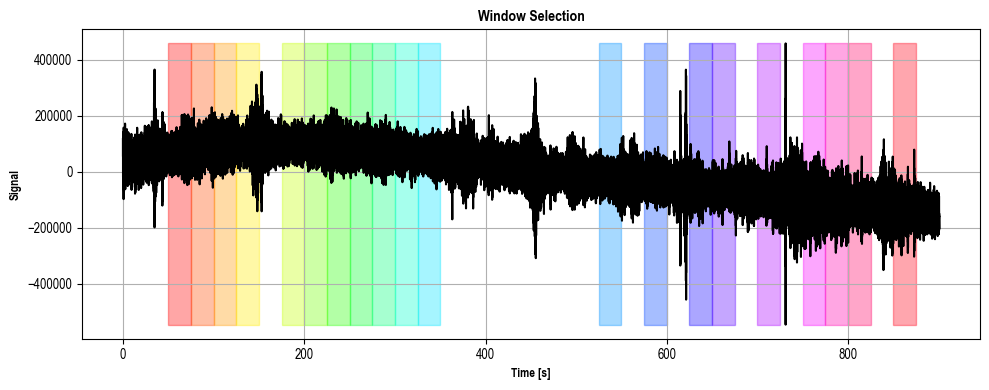

plot_selected_windows OK...
taper_function OK...


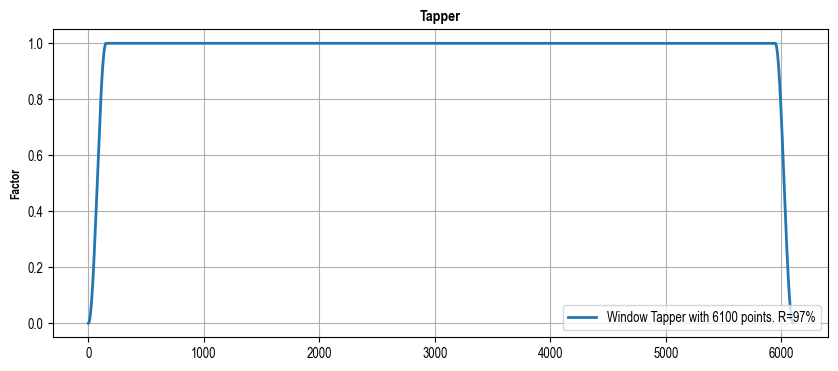

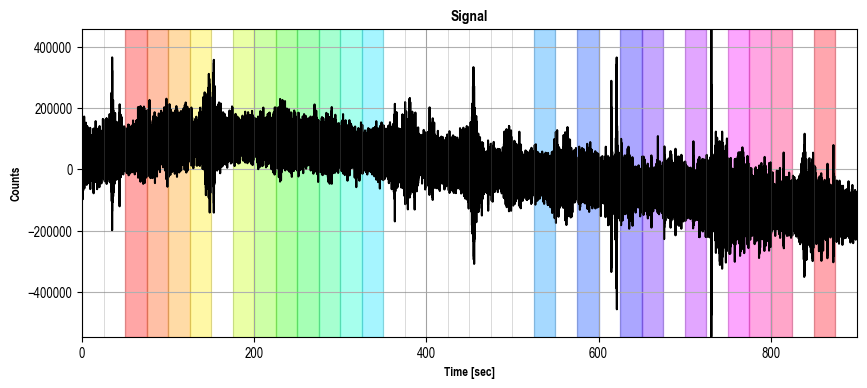

plot_tapper OK...
compute_fft OK...


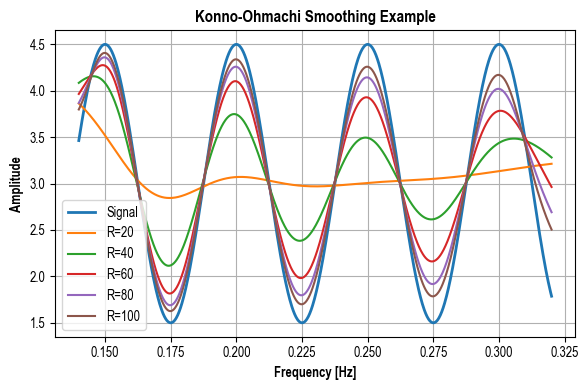

sua_vent OK...
prom_vent OK...


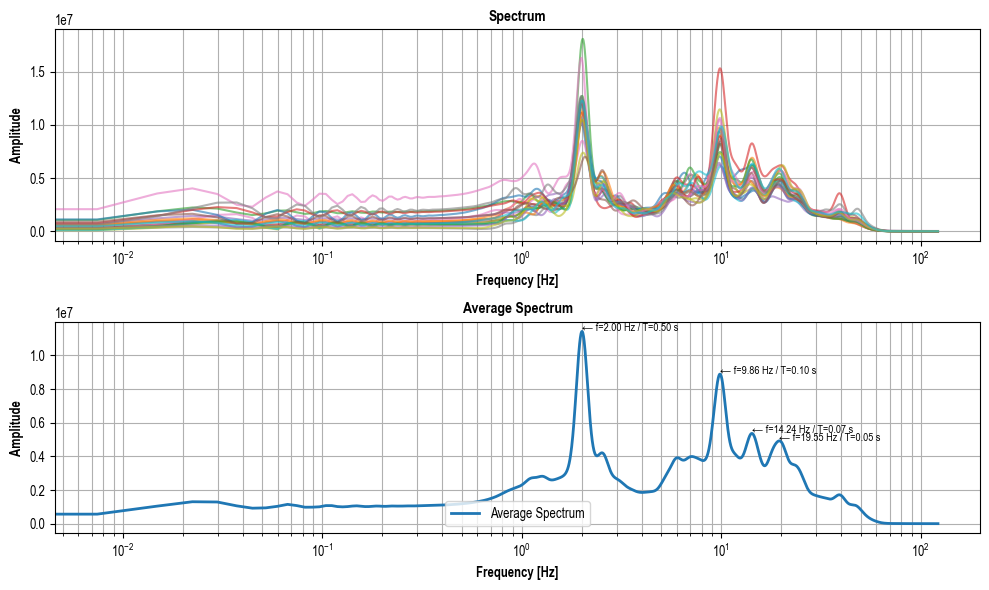

prom_vent OK...


In [4]:
signal_path = r'C:\Users\ppala\OneDrive\01. Brain\11. GitHub\AmbientSoilPeriod\signals\TS01.txt'
builder = BuildPeriod(signal_path, config)

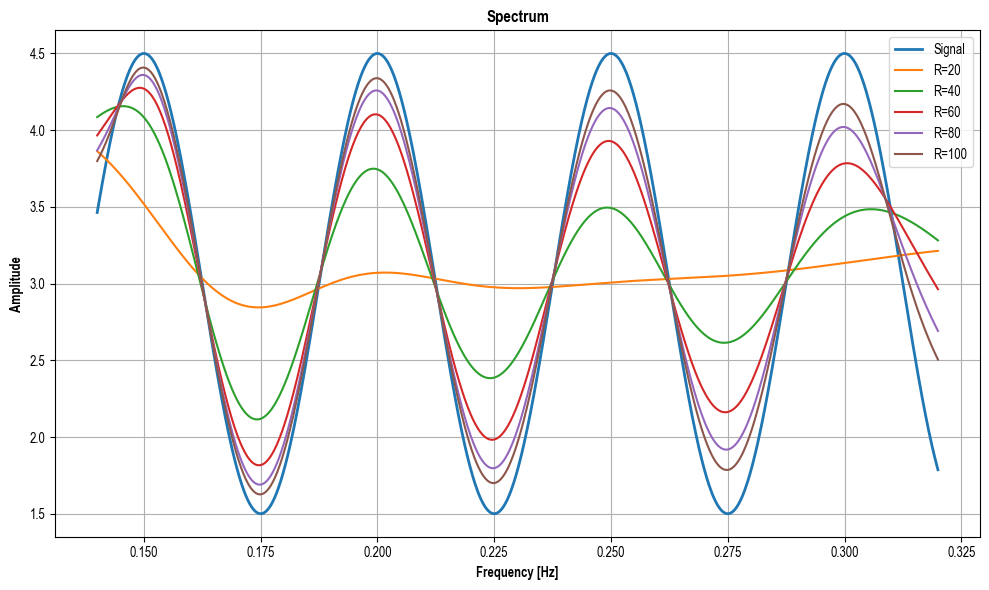

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def konno_ohmachi_weight(f, fc, b=40):
    """
    Konno-Ohmachi smoothing function
    Parameters:
    -----------
    f : ndarray
        Vector de frecuencias sobre el cual se evalúa el suavizado
    fc : float
        Frecuencia central
    b : float
        Coeficiente de suavizado
    Returns:
    --------
    weights : ndarray
        Valores del suavizador
    """
    x = np.log10(f / fc)
    with np.errstate(divide='ignore', invalid='ignore'):
        w = np.where(
            x == 0,
            1.0,
            (np.sin(b * x) / (b * x))**4
        )
    return w

# --- Crear una señal espectral sintética con picos regulares ---
f = np.linspace(0.14, 0.32, 1000)  # Frecuencias
signal = 3 + 1.5 * np.cos(40 * np.pi * f)  # Espectro con picos artificiales

# --- Suavizado con distintos valores de b ---
R_values = [20, 40, 60, 80, 100]
smoothed_spectra = []

for R in R_values:
    smoothed = np.zeros_like(f)
    for i, fc in enumerate(f):
        weights = konno_ohmachi_weight(f, fc, b=R)
        smoothed[i] = np.sum(weights * signal) / np.sum(weights)
    smoothed_spectra.append(smoothed)

# --- Graficar ---
plt.figure(figsize=(10, 6))
plt.plot(f, signal, label='Signal', linewidth=2)
for R, smoothed in zip(R_values, smoothed_spectra):
    plt.plot(f, smoothed, label=f'R={R}')
    
plt.xlabel('Frequency [Hz]', fontweight='bold')
plt.ylabel('Amplitude', fontweight='bold')
plt.title('Spectrum', fontweight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
